<a href="https://colab.research.google.com/github/renatagomezc/Regresion-Lineal/blob/main/DF_Actividad_6_1_(Regresi%C3%B3n_Lineal_Simple).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad 6.1 (Regresión Lineal Simple) DF**

In [670]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [671]:
df= pd.read_csv('DF_limpio.csv', index_col=0)
df.head()

<ipython-input-671-995f848a946f>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('DF_limpio.csv', index_col=0)


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0.0,2056638,20230329041210,10531228,3.0,7.0,0.0,19.35353,-99.16299,3.0,0.0,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...","$1,434.00",t,2023-03-30,2014-01-03,2018-06-24,f
1.0,2072354,20230329041210,16840050,3.0,3.0,0.0,19.35358,-99.16948,2.0,0.0,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",$830.00,t,2023-03-30,2014-01-01,2022-11-04,f
2.0,696037,20230329041210,3531879,4.0,4.0,0.0,19.4418,-99.18402,6.0,0.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...","$1,469.00",t,2023-03-29,2012-10-31,2022-12-21,f
3.0,35797,20230329041210,153786,1.0,1.0,0.0,19.38283,0.0,2.0,0.0,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...","$3,658.00",t,2023-03-29,--,--,f
4.0,44616,20230329041210,196253,16.0,16.0,0.0,19.41162,-99.17794,0.0,0.0,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...","$18,000.00",t,2023-03-30,2011-11-09,2023-03-26,f


**Valores Nulos**

In [672]:
valores_nulos=df.isnull().sum()
valores_nulos

id                           0
scrape_id                    0
host_id                      0
host_listings_count          0
host_total_listings_count    0
                            ..
has_availability             2
calendar_last_scraped        2
first_review                 2
last_review                  2
instant_bookable             2
Length: 75, dtype: int64

In [673]:
Y = df.select_dtypes(include=[np.float, np.int])
x = df.select_dtypes(include=[np.object])

<ipython-input-673-8b94f98b8969>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y = df.select_dtypes(include=[np.float, np.int])
<ipython-input-673-8b94f98b8969>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y = df.se

In [674]:
Y = Y.fillna(0)
x=x.fillna('--')

In [675]:
df=pd.merge(Y,x, left_index=True, right_index=True)

In [676]:
valores_nulos=df.isnull().sum()
valores_nulos

availability_60          0
availability_90          0
availability_365         0
number_of_reviews        0
number_of_reviews_ltm    0
                        ..
has_availability         0
calendar_last_scraped    0
first_review             0
last_review              0
instant_bookable         0
Length: 75, dtype: int64

**Outliers**

Ya estoy trabajando con un dataframe limpio por lo que los valores nulos y outliers ya fueron tratados

##**Entire home/apt**

In [677]:
entire=df[df['room_type']=='Entire home/apt']

###**host_acceptance_rate vs host_response_rate**

In [678]:
entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\%':''}, regex = True)
entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\,':''}, regex = True)
entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'--':'0'}, regex = True)
entire['host_acceptance_rate'] = entire['host_acceptance_rate'].astype(float)

entire.host_response_rate= entire.host_response_rate.replace({'\%':''}, regex = True)
entire.host_response_rate= entire.host_response_rate.replace({'\,':''}, regex = True)
entire.host_response_rate= entire.host_response_rate.replace({'--':'0'}, regex = True)
entire['host_response_rate'] = entire['host_response_rate'].astype(float)

<ipython-input-678-bf8a7a08eacd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-678-bf8a7a08eacd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-678-bf8a7a08eacd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [679]:
x= entire[['host_response_rate']]
y= entire[['host_acceptance_rate']]
data=entire

In [680]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,host_response_rate,host_acceptance_rate
host_response_rate,1.000000,0.692644
host_acceptance_rate,0.692644,1.000000


In [681]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,host_response_rate,host_acceptance_rate
host_response_rate,1.000000,0.692644
host_acceptance_rate,0.692644,1.000000


<Axes: >

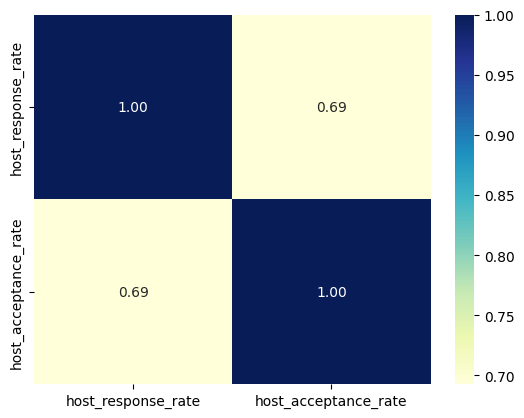

In [682]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

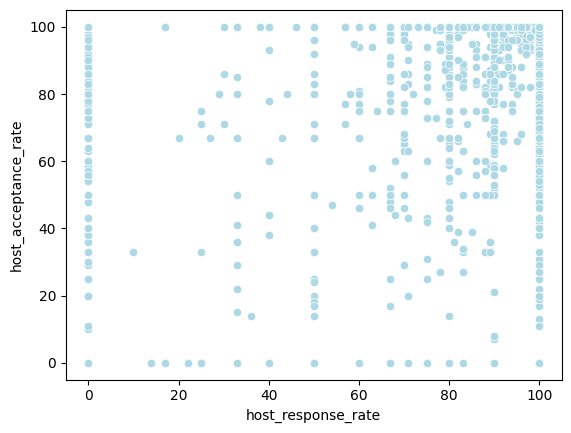

In [683]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [684]:
Vars_Indep= x
Var_Dep= y

In [685]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [686]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [687]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [688]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.62852689]]),
 'rank_': 1,
 'singular_': array([3993.49390386]),
 'intercept_': array([32.77244893])}

####**Modelo matemático**
 Modelo matemático:y= 0.62852689x + 32.77244893**

---




In [689]:
y_pred= model.predict(X=x)
y_pred

array([[95.62513821],
       [32.77244893],
       [95.62513821],
       ...,
       [32.77244893],
       [95.62513821],
       [32.77244893]])

In [690]:
#Insertamos la columna de predicciones en el DataFrame
data.insert(0, 'Predicciones', y_pred)
data[[x.columns[0],'Predicciones']]


,host_response_rate,Predicciones
0.0,100.0,95.625138
1.0,0.0,32.772449
2.0,100.0,95.625138
3.0,0.0,32.772449
4.0,100.0,95.625138
...,...,...
24217.0,100.0,95.625138
24219.0,100.0,95.625138
24220.0,0.0,32.772449
24222.0,100.0,95.625138


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

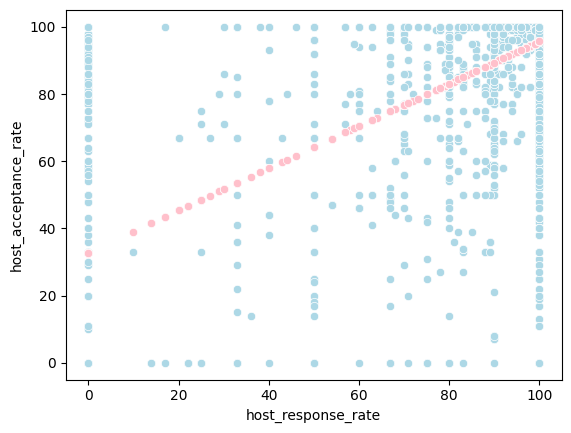

In [691]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [692]:
varx_e=[]
vary_e=[]
deter_e=[]
corr_e=[]

In [693]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [694]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.4797559816175937

In [695]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.6926441955416891

###**host_acceptance_rate vs price**

In [696]:
entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\%':''}, regex = True)
entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\,':''}, regex = True)
entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'--':'0'}, regex = True)
entire['host_acceptance_rate'] = entire['host_acceptance_rate'].astype(float)

entire.price= entire.price.replace({'\$':''}, regex = True)
entire.price= entire.price.replace({'\,':''}, regex = True)
entire.price= entire.price.replace({'--':'0'}, regex = True)

entire['price'] = entire['price'].astype(float)

<ipython-input-696-af93ca077cdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-696-af93ca077cdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-696-af93ca077cdc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [697]:
x= entire[['price']]
y= entire[['host_acceptance_rate']]
data=entire

In [698]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,price,host_acceptance_rate
price,1.000000,-0.023561
host_acceptance_rate,-0.023561,1.000000


In [699]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,price,host_acceptance_rate
price,1.000000,0.023561
host_acceptance_rate,0.023561,1.000000


<Axes: >

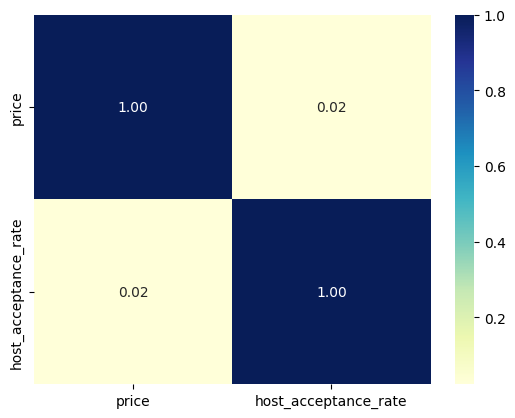

In [700]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

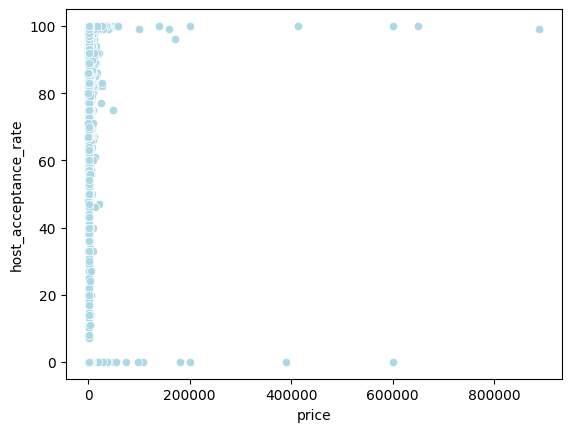

In [701]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [702]:
Vars_Indep= x
Var_Dep= y

In [703]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [704]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [705]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [706]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-4.66947697e-05]]),
 'rank_': 1,
 'singular_': array([1828454.48919382]),
 'intercept_': array([87.43659536])}

####**Modelo matemático**
 Modelo matemático:y= -4.66947697e-05x + 87.43659536

---




In [707]:
y_pred= model.predict(X=x)
y_pred

array([[87.36963506],
       [87.3978387 ],
       [87.36800074],
       ...,
       [87.36561931],
       [87.38056163],
       [87.35628035]])

In [708]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-708-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,price,Predicciones
0.0,1434.0,87.369635
1.0,830.0,87.397839
2.0,1469.0,87.368001
3.0,3658.0,87.265786
4.0,18000.0,86.596090
...,...,...
24217.0,980.0,87.390834
24219.0,760.0,87.401107
24220.0,1520.0,87.365619
24222.0,1200.0,87.380562


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

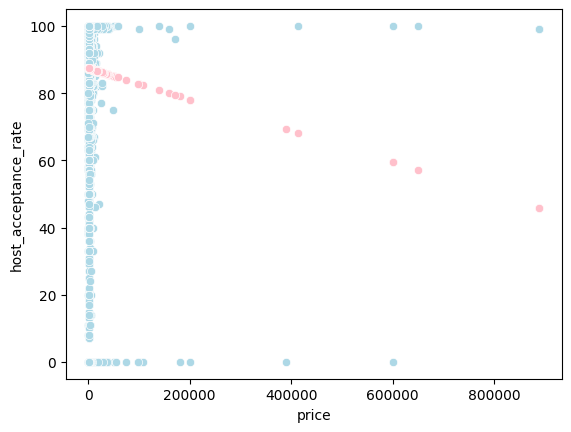

In [709]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [710]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [711]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.000555100224774896

In [712]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.023560565035136486

###**host_acceptance_rate vs number_of_reviews**

In [713]:
entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\%':''}, regex = True)
entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\,':''}, regex = True)
entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'--':'0'}, regex = True)
entire['host_acceptance_rate'] = entire['host_acceptance_rate'].astype(float)

entire.number_of_reviews= entire.number_of_reviews.replace({'\$':''}, regex = True)
entire.number_of_reviews= entire.number_of_reviews.replace({'\,':''}, regex = True)
entire.number_of_reviews= entire.number_of_reviews.replace({'--':'0'}, regex = True)
entire['number_of_reviews'] = entire['number_of_reviews'].astype(float)

<ipython-input-713-acd4250babd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-713-acd4250babd5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-713-acd4250babd5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [714]:
x= entire[['number_of_reviews']]
y= entire[['host_acceptance_rate']]
data=entire

In [715]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,number_of_reviews,host_acceptance_rate
number_of_reviews,1.000000,0.133599
host_acceptance_rate,0.133599,1.000000


In [716]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,number_of_reviews,host_acceptance_rate
number_of_reviews,1.000000,0.133599
host_acceptance_rate,0.133599,1.000000


<Axes: >

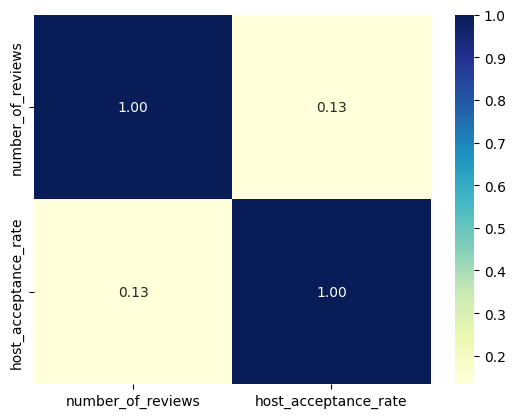

In [717]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

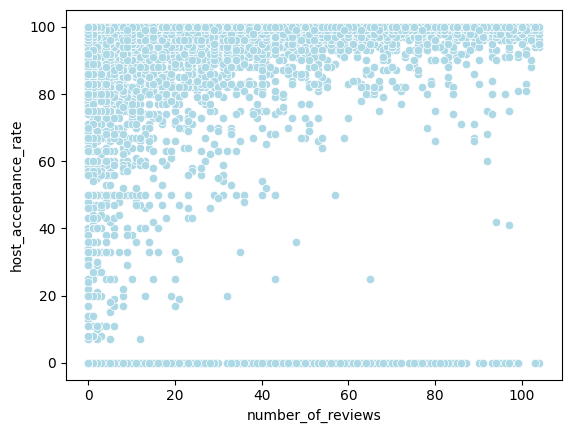

In [718]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [719]:
Vars_Indep= x
Var_Dep= y

In [720]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [721]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [722]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [723]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.15211964]]),
 'rank_': 1,
 'singular_': array([3182.6088089]),
 'intercept_': array([84.17320674])}

####**Modelo matemático**
 Modelo matemático:y= 0.15211964x + 84.17320674

---




In [724]:
y_pred= model.predict(X=x)
y_pred

array([[87.36771924],
       [93.45250495],
       [90.10587281],
       ...,
       [84.17320674],
       [84.17320674],
       [84.17320674]])

In [725]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-725-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,number_of_reviews,Predicciones
0.0,21.0,87.367719
1.0,61.0,93.452505
2.0,39.0,90.105873
3.0,0.0,84.173207
4.0,64.0,93.908864
...,...,...
24217.0,0.0,84.173207
24219.0,0.0,84.173207
24220.0,0.0,84.173207
24222.0,0.0,84.173207


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

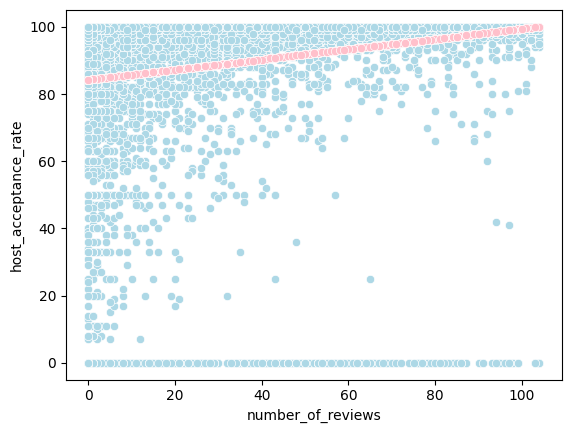

In [726]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [727]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [728]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.017848582544274127

In [729]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.133598587358827

###**review_scores_location vs review_scores_cleanliness**


In [730]:
x= entire[['review_scores_cleanliness']]
y= entire[['review_scores_location']]
data=entire

In [731]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,review_scores_cleanliness,review_scores_location
review_scores_cleanliness,1.000000,0.897834
review_scores_location,0.897834,1.000000


In [732]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,review_scores_cleanliness,review_scores_location
review_scores_cleanliness,1.000000,0.897834
review_scores_location,0.897834,1.000000


<Axes: >

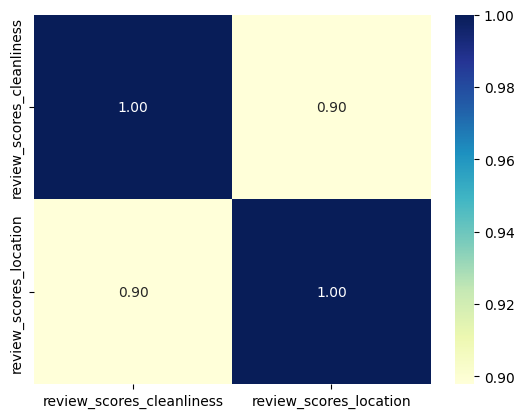

In [733]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

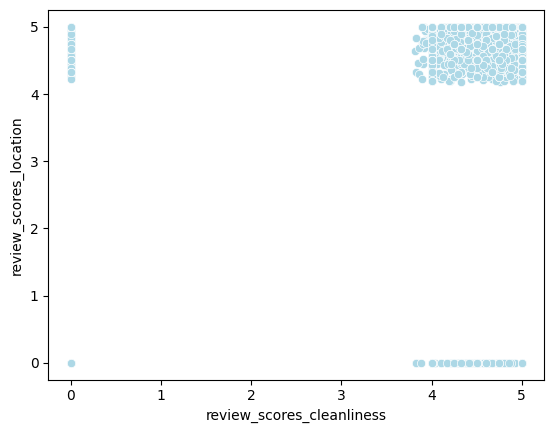

In [734]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [735]:
Vars_Indep= x
Var_Dep= y

In [736]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [737]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [738]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [739]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.918502]]),
 'rank_': 1,
 'singular_': array([202.42457584]),
 'intercept_': array([0.38539555])}

####**Modelo matemático**
 Modelo matemático:y= 0.918502x + 0.38539555

---




In [740]:
y_pred= model.predict(X=x)
y_pred

array([[4.93198047],
       [4.86768533],
       [4.71153999],
       ...,
       [0.38539555],
       [0.38539555],
       [0.38539555]])

In [741]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-741-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,review_scores_cleanliness,Predicciones
0.0,4.95,4.931980
1.0,4.88,4.867685
2.0,4.71,4.711540
3.0,0.00,0.385396
4.0,4.70,4.702355
...,...,...
24217.0,0.00,0.385396
24219.0,0.00,0.385396
24220.0,0.00,0.385396
24222.0,0.00,0.385396


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

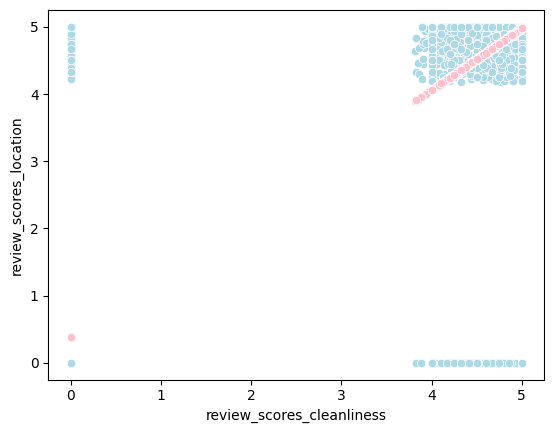

In [742]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [743]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [744]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.8061059975110008

In [745]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.8978340590058949

###**availability_365 vs number_of_reviews**


In [746]:
x= entire[['number_of_reviews']]
y= entire[['availability_365']]
data=entire

In [747]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,number_of_reviews,availability_365
number_of_reviews,1.000000,-0.052747
availability_365,-0.052747,1.000000


In [748]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,number_of_reviews,availability_365
number_of_reviews,1.000000,0.052747
availability_365,0.052747,1.000000


<Axes: >

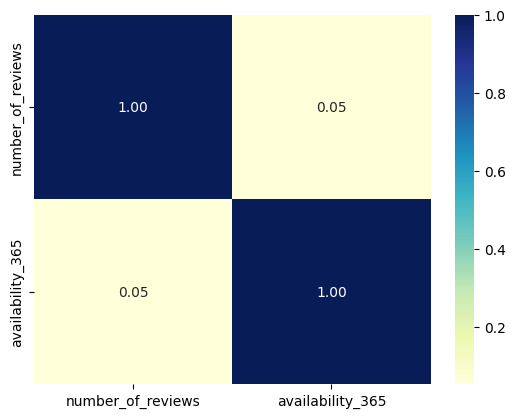

In [749]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

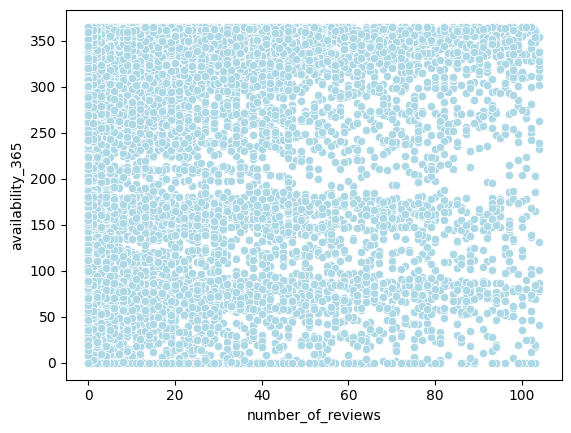

In [750]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [751]:
Vars_Indep= x
Var_Dep= y

In [752]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [753]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [754]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [755]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-0.25499994]]),
 'rank_': 1,
 'singular_': array([3182.6088089]),
 'intercept_': array([246.03421549])}

####**Modelo matemático**
 Modelo matemático:y= 0.25499994x + 246.03421549

---




In [756]:
y_pred= model.predict(X=x)
y_pred

array([[240.67921673],
       [230.47921908],
       [236.08921779],
       ...,
       [246.03421549],
       [246.03421549],
       [246.03421549]])

In [757]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-757-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,number_of_reviews,Predicciones
0.0,21.0,240.679217
1.0,61.0,230.479219
2.0,39.0,236.089218
3.0,0.0,246.034215
4.0,64.0,229.714219
...,...,...
24217.0,0.0,246.034215
24219.0,0.0,246.034215
24220.0,0.0,246.034215
24222.0,0.0,246.034215


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

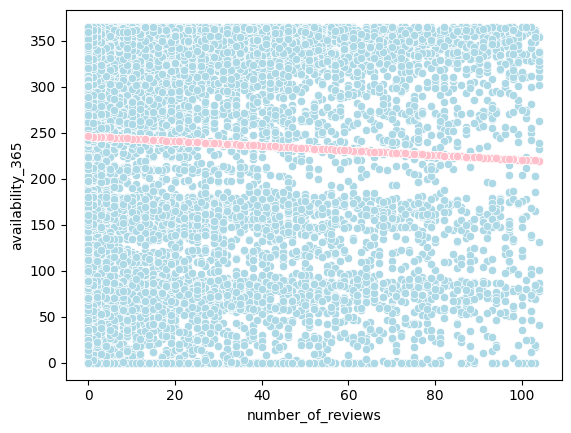

In [758]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [759]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [760]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.002782199352602599

In [761]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.052746557732259634

###**reviews_per_month vs review_scores_communication**


In [762]:
x= entire[['review_scores_communication']]
y= entire[['reviews_per_month']]
data=entire

In [763]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,review_scores_communication,reviews_per_month
review_scores_communication,1.000000,0.375485
reviews_per_month,0.375485,1.000000


In [764]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,review_scores_communication,reviews_per_month
review_scores_communication,1.000000,0.375485
reviews_per_month,0.375485,1.000000


<Axes: >

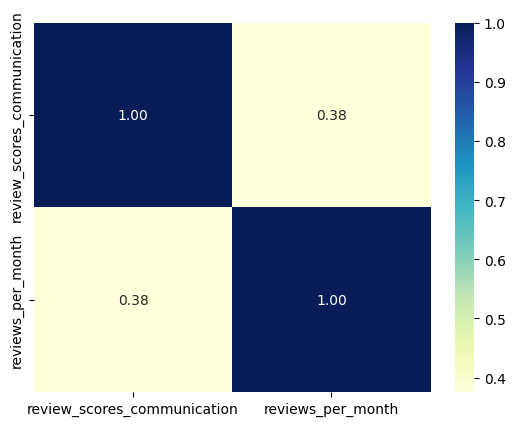

In [765]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

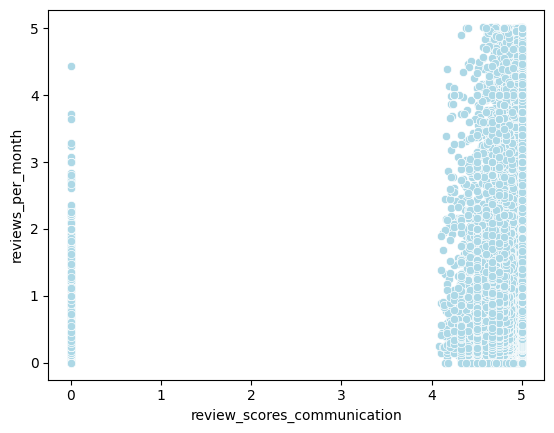

In [766]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [767]:
Vars_Indep= x
Var_Dep= y

In [768]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [769]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [770]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [771]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.28910344]]),
 'rank_': 1,
 'singular_': array([209.24345598]),
 'intercept_': array([0.16789008])}

####**Modelo matemático**
 Modelo matemático:y= 0.28910344x + 0.16789008

---




In [772]:
y_pred= model.predict(X=x)
y_pred

array([[1.59895212],
       [1.61340729],
       [1.59027901],
       ...,
       [0.16789008],
       [0.16789008],
       [0.16789008]])

In [773]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-773-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,review_scores_communication,Predicciones
0.0,4.95,1.598952
1.0,5.00,1.613407
2.0,4.92,1.590279
3.0,0.00,0.167890
4.0,4.78,1.549805
...,...,...
24217.0,0.00,0.167890
24219.0,0.00,0.167890
24220.0,0.00,0.167890
24222.0,0.00,0.167890


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

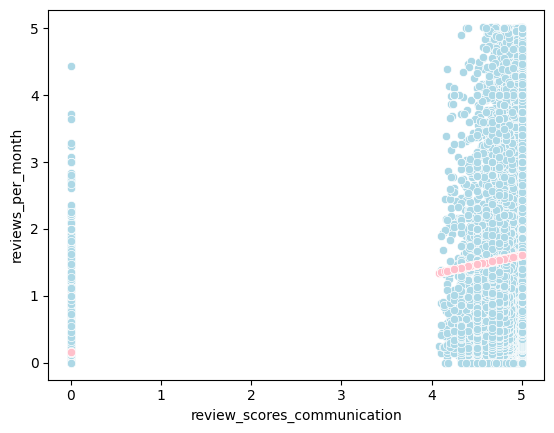

In [774]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [775]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [776]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.1409890826724347

In [777]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.3754851297620649

##**Private room**

In [778]:
private=df[df['property_type']=='Private room']

###**host_acceptance_rate vs host_response_rate**

In [779]:
data=private

In [780]:
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'--':'0'}, regex = True)
data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(float)

data.host_response_rate= data.host_response_rate.replace({'\%':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'\,':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'--':'0'}, regex = True)
data['host_response_rate'] = data['host_response_rate'].astype(float)

<ipython-input-780-0ef7a7995669>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-780-0ef7a7995669>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-780-0ef7a7995669>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [781]:
x= data[['host_response_rate']]
y= data[['host_acceptance_rate']]

In [782]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,host_response_rate,host_acceptance_rate
host_response_rate,1.000000,0.692644
host_acceptance_rate,0.692644,1.000000


In [783]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,host_response_rate,host_acceptance_rate
host_response_rate,1.000000,0.692644
host_acceptance_rate,0.692644,1.000000


<Axes: >

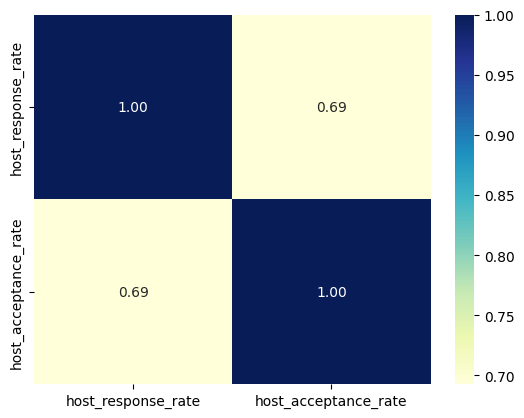

In [784]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

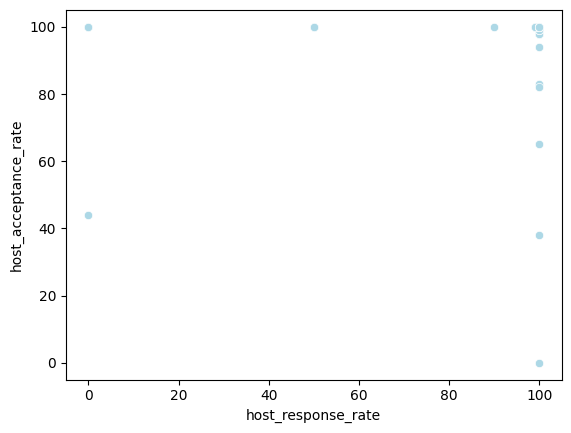

In [785]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [786]:
Vars_Indep= x
Var_Dep= y

In [787]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [788]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [789]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [790]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.08441061]]),
 'rank_': 1,
 'singular_': array([176.50627501]),
 'intercept_': array([85.15840799])}

####**Modelo matemático**
 Modelo matemático:y= 0.08441061x + 85.15840799

---




In [791]:
y_pred= model.predict(X=x)
y_pred

array([[93.59946911],
       [93.59946911],
       [89.37893855],
       [89.37893855],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [85.15840799],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [85.15840799],
       [93.5150585 ],
       [93.5150585 ],
       [85.15840799],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [92.755363  ],
       [93.59946911],
       [93.59946911],
       [93.59946911],
       [93.59946911]])

In [792]:
#Insertamos la columna de predicciones en el DataFrame
data.insert(0, 'Predicciones', y_pred)
data[[x.columns[0],'Predicciones']]


,host_response_rate,Predicciones
21.0,100.0,93.599469
1062.0,100.0,93.599469
2670.0,50.0,89.378939
2805.0,50.0,89.378939
3065.0,100.0,93.599469
3257.0,100.0,93.599469
3359.0,100.0,93.599469
3372.0,100.0,93.599469
3455.0,100.0,93.599469
3571.0,0.0,85.158408


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

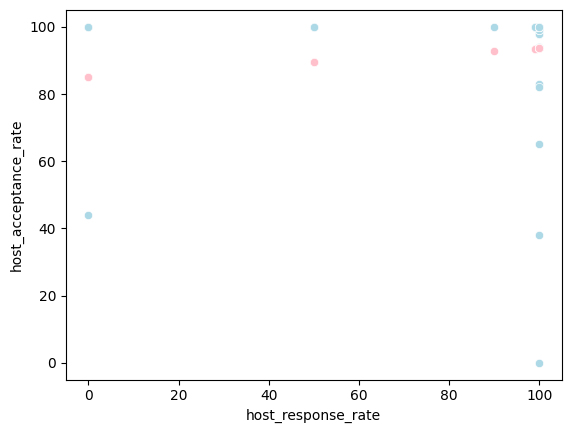

In [793]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [794]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [795]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.013332856431684359

In [796]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.11546798877474379

###**host_acceptance_rate vs price**

In [797]:
data=private

In [798]:
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'--':'0'}, regex = True)
data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(float)

data.price= data.price.replace({'\$':''}, regex = True)
data.price= data.price.replace({'\,':''}, regex = True)
data.price= data.price.replace({'--':'0'}, regex = True)
data['price'] = data['price'].astype(float)

<ipython-input-798-60fe33bd4ab8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-798-60fe33bd4ab8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-798-60fe33bd4ab8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [799]:
x= data[['price']]
y= data[['host_acceptance_rate']]

In [800]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,price,host_acceptance_rate
price,1.000000,-0.023561
host_acceptance_rate,-0.023561,1.000000


In [801]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,price,host_acceptance_rate
price,1.000000,0.023561
host_acceptance_rate,0.023561,1.000000


<Axes: >

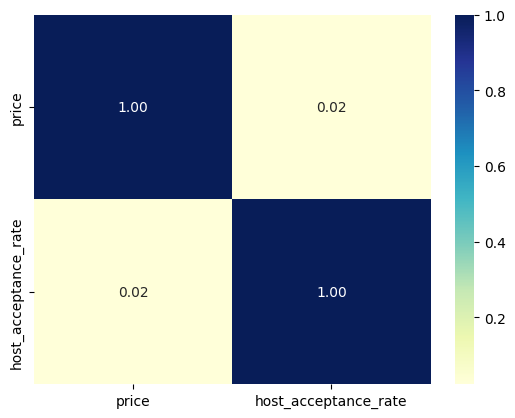

In [802]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

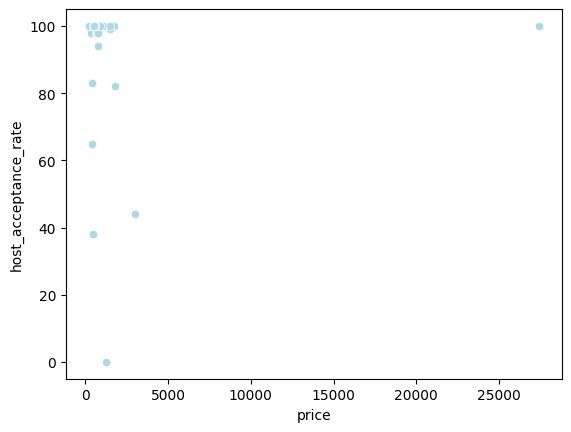

In [803]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [804]:
Vars_Indep= x
Var_Dep= y

In [805]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [806]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [807]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [808]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[5.14675674e-05]]),
 'rank_': 1,
 'singular_': array([26595.4822969]),
 'intercept_': array([92.71990104])}

####**Modelo matemático**
 Modelo matemático:y= 5.14675674e-05x + 92.71990104

---




In [809]:
y_pred= model.predict(X=x)
y_pred

array([[92.7839267 ],
       [92.75839878],
       [92.72921667],
       [92.74048807],
       [92.75078158],
       [92.74604657],
       [92.75927373],
       [92.76220738],
       [92.73920138],
       [92.77136861],
       [94.13191376],
       [92.74697298],
       [92.74970076],
       [92.81032956],
       [92.73637066],
       [92.74306145],
       [92.73734855],
       [92.75850172],
       [92.77553748],
       [92.73863524],
       [92.75284029],
       [92.75762677],
       [92.75654595],
       [92.75793558],
       [92.74635537],
       [92.79663919],
       [92.74048807],
       [92.74306145],
       [92.79663919],
       [92.75958254],
       [92.73240766],
       [92.73194445],
       [92.87430375],
       [92.81254266],
       [92.76622185],
       [92.79638185],
       [92.75078158],
       [92.74059101],
       [92.73122391],
       [92.74306145],
       [92.75078158],
       [92.74563483],
       [92.74712739]])

In [810]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-810-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,price,Predicciones
21.0,1244.0,92.783927
1062.0,748.0,92.758399
2670.0,181.0,92.729217
2805.0,400.0,92.740488
3065.0,600.0,92.750782
3257.0,508.0,92.746047
3359.0,765.0,92.759274
3372.0,822.0,92.762207
3455.0,375.0,92.739201
3571.0,1000.0,92.771369


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

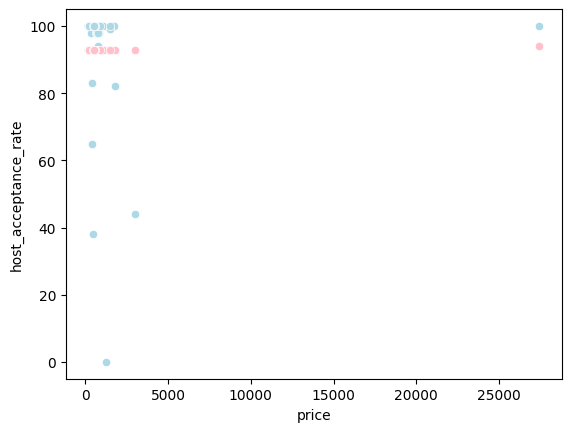

In [811]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [812]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [813]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.00011253609443118151

In [814]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.010608303089145855

###**host_acceptance_rate vs number_of_reviews**

In [815]:
data=private

In [816]:
x= data[['number_of_reviews']]
y= data[['host_acceptance_rate']]

In [817]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,number_of_reviews,host_acceptance_rate
number_of_reviews,1.000000,0.133599
host_acceptance_rate,0.133599,1.000000


In [818]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,number_of_reviews,host_acceptance_rate
number_of_reviews,1.000000,0.133599
host_acceptance_rate,0.133599,1.000000


<Axes: >

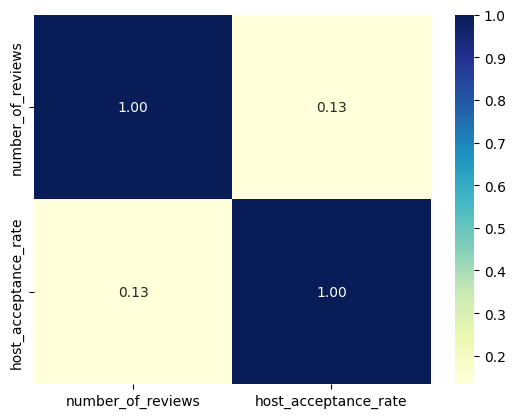

In [819]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

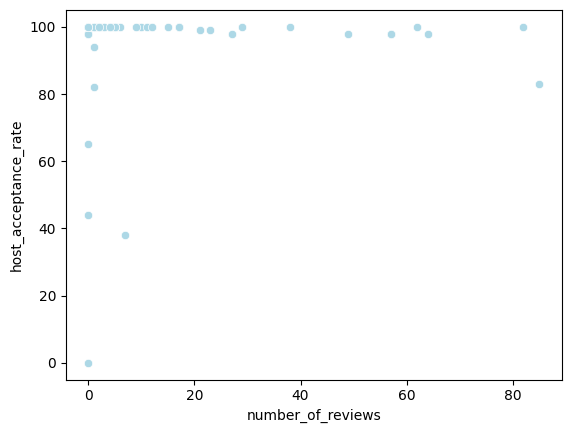

In [820]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [821]:
Vars_Indep= x
Var_Dep= y

In [822]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [823]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [824]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [825]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.11695192]]),
 'rank_': 1,
 'singular_': array([154.54705011]),
 'intercept_': array([90.8106745])}

####**Modelo matemático**
 Modelo matemático:y= 0.11695192x + 90.8106745

---




In [826]:
y_pred= model.predict(X=x)
y_pred

array([[ 90.8106745 ],
       [ 92.56495327],
       [ 90.92762642],
       [ 92.79885711],
       [ 91.51238601],
       [ 90.8106745 ],
       [ 90.8106745 ],
       [ 90.8106745 ],
       [100.75158756],
       [ 90.8106745 ],
       [ 91.04457833],
       [100.40073181],
       [ 91.98019368],
       [ 94.20228013],
       [ 93.96837629],
       [ 91.27848217],
       [ 90.8106745 ],
       [ 90.92762642],
       [ 92.0971456 ],
       [ 98.06169344],
       [ 97.47693385],
       [ 96.5413185 ],
       [ 97.47693385],
       [ 98.29559728],
       [ 90.92762642],
       [ 93.50056862],
       [ 90.8106745 ],
       [ 91.62933793],
       [ 93.26666478],
       [ 95.2548474 ],
       [ 92.79885711],
       [ 91.39543409],
       [ 90.8106745 ],
       [ 90.92762642],
       [ 90.92762642],
       [ 90.8106745 ],
       [ 91.86324176],
       [ 92.21409752],
       [ 91.16153025],
       [ 91.39543409],
       [ 91.27848217],
       [ 91.04457833],
       [ 90.8106745 ]])

In [827]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-827-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,number_of_reviews,Predicciones
21.0,0.0,90.810674
1062.0,15.0,92.564953
2670.0,1.0,90.927626
2805.0,17.0,92.798857
3065.0,6.0,91.512386
3257.0,0.0,90.810674
3359.0,0.0,90.810674
3372.0,0.0,90.810674
3455.0,85.0,100.751588
3571.0,0.0,90.810674


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

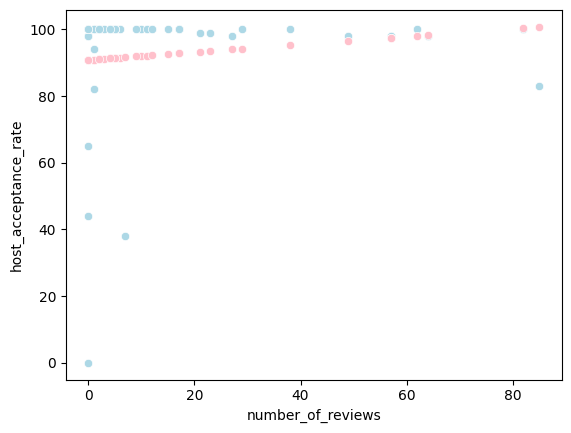

In [828]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [829]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [830]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.01962207600985133

In [831]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.14007882070409977

###**review_scores_location vs review_scores_cleanliness**


In [832]:
data=private
x= data[['review_scores_cleanliness']]
y= data[['review_scores_location']]

In [833]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,review_scores_cleanliness,review_scores_location
review_scores_cleanliness,1.000000,0.897834
review_scores_location,0.897834,1.000000


In [834]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,review_scores_cleanliness,review_scores_location
review_scores_cleanliness,1.000000,0.897834
review_scores_location,0.897834,1.000000


<Axes: >

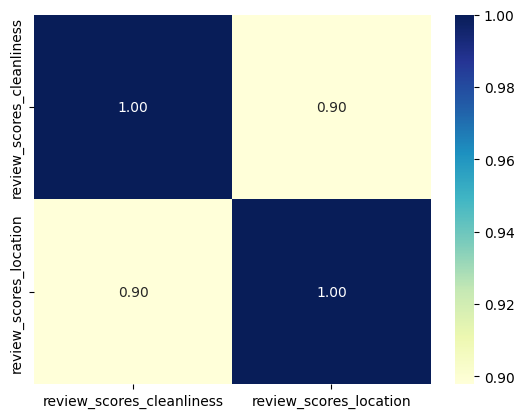

In [835]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

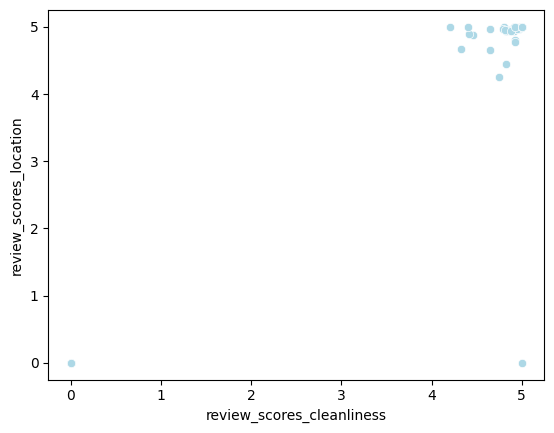

In [836]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [837]:
Vars_Indep= x
Var_Dep= y

In [838]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [839]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [840]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [841]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.97249811]]),
 'rank_': 1,
 'singular_': array([11.7649254]),
 'intercept_': array([0.06239836])}

####**Modelo matemático**
 Modelo matemático:y= 0.97249811 + 0.06239836

---




In [842]:
y_pred= model.predict(X=x)
y_pred

array([[0.06239836],
       [4.85681402],
       [0.06239836],
       [4.58451455],
       [4.73038927],
       [4.866539  ],
       [4.39973991],
       [4.36083999],
       [4.78873915],
       [0.06239836],
       [4.92488889],
       [4.74983923],
       [4.92488889],
       [4.89571395],
       [4.85681402],
       [4.92488889],
       [4.83736406],
       [4.92488889],
       [4.74983923],
       [4.72066429],
       [4.80818912],
       [4.88598896],
       [4.83736406],
       [4.90543893],
       [4.92488889],
       [4.58451455],
       [0.06239836],
       [4.92488889],
       [4.74011425],
       [4.87626398],
       [4.80818912],
       [4.34139002],
       [0.06239836],
       [4.92488889],
       [4.92488889],
       [0.06239836],
       [4.27331516],
       [4.84708904],
       [4.92488889],
       [4.1468904 ],
       [4.68176436],
       [4.92488889],
       [0.06239836]])

In [843]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-843-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,review_scores_cleanliness,Predicciones
21.0,0.00,0.062398
1062.0,4.93,4.856814
2670.0,0.00,0.062398
2805.0,4.65,4.584515
3065.0,4.80,4.730389
3257.0,4.94,4.866539
3359.0,4.46,4.399740
3372.0,4.42,4.360840
3455.0,4.86,4.788739
3571.0,0.00,0.062398


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

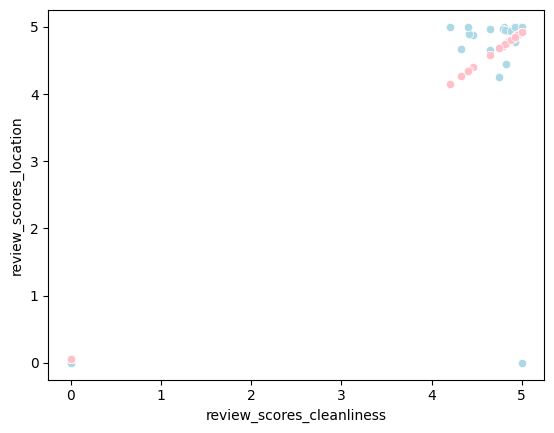

In [844]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [845]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [846]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.8291519761501737

In [847]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.9105778254219535

###**availability_365 vs number_of_reviews**


In [848]:
data=private
x= data[['number_of_reviews']]
y= data[['availability_365']]

In [849]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,number_of_reviews,availability_365
number_of_reviews,1.000000,-0.052747
availability_365,-0.052747,1.000000


In [850]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,number_of_reviews,availability_365
number_of_reviews,1.000000,0.052747
availability_365,0.052747,1.000000


<Axes: >

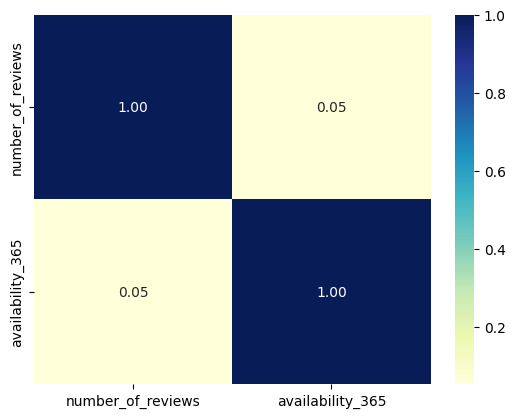

In [851]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

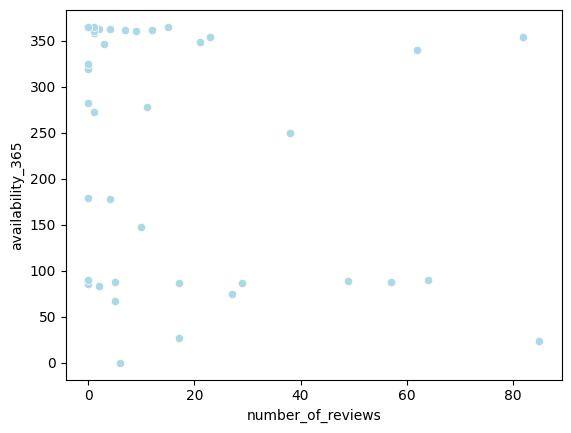

In [852]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [853]:
Vars_Indep= x
Var_Dep= y

In [854]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [855]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [856]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [857]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-1.51833024]]),
 'rank_': 1,
 'singular_': array([154.54705011]),
 'intercept_': array([254.70568407])}

####**Modelo matemático**
 Modelo matemático:y= 1.51833024 + 254.70568407

---




In [858]:
y_pred= model.predict(X=x)
y_pred

array([[254.70568407],
       [231.93073046],
       [253.18735383],
       [228.89406998],
       [245.59570263],
       [254.70568407],
       [254.70568407],
       [254.70568407],
       [125.64761364],
       [254.70568407],
       [251.66902359],
       [130.20260436],
       [239.52238167],
       [210.6741071 ],
       [213.71076758],
       [248.63236311],
       [254.70568407],
       [253.18735383],
       [238.00405143],
       [160.56920917],
       [168.16086037],
       [180.30750229],
       [168.16086037],
       [157.53254869],
       [253.18735383],
       [219.78408854],
       [254.70568407],
       [244.07737239],
       [222.82074902],
       [197.00913494],
       [228.89406998],
       [247.11403287],
       [254.70568407],
       [253.18735383],
       [253.18735383],
       [254.70568407],
       [241.04071191],
       [236.48572118],
       [250.15069335],
       [247.11403287],
       [248.63236311],
       [251.66902359],
       [254.70568407]])

In [859]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-859-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,number_of_reviews,Predicciones
21.0,0.0,254.705684
1062.0,15.0,231.930730
2670.0,1.0,253.187354
2805.0,17.0,228.894070
3065.0,6.0,245.595703
3257.0,0.0,254.705684
3359.0,0.0,254.705684
3372.0,0.0,254.705684
3455.0,85.0,125.647614
3571.0,0.0,254.705684


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

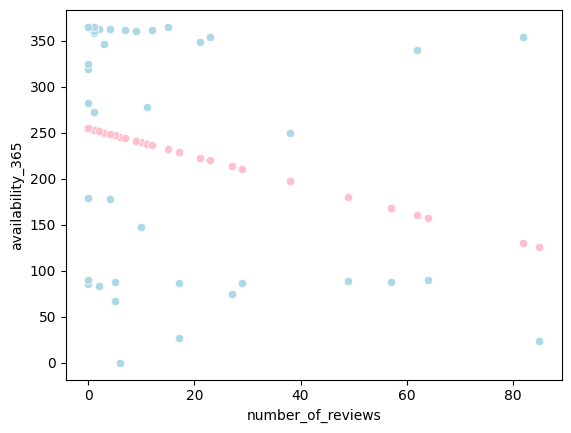

In [860]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [861]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [862]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.07377240301885857

In [863]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.2716107564491115

###**reviews_per_month vs review_scores_communication**


In [864]:
data=private
x= data[['review_scores_communication']]
y= data[['reviews_per_month']]

In [865]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,review_scores_communication,reviews_per_month
review_scores_communication,1.000000,0.375485
reviews_per_month,0.375485,1.000000


In [866]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,review_scores_communication,reviews_per_month
review_scores_communication,1.000000,0.375485
reviews_per_month,0.375485,1.000000


<Axes: >

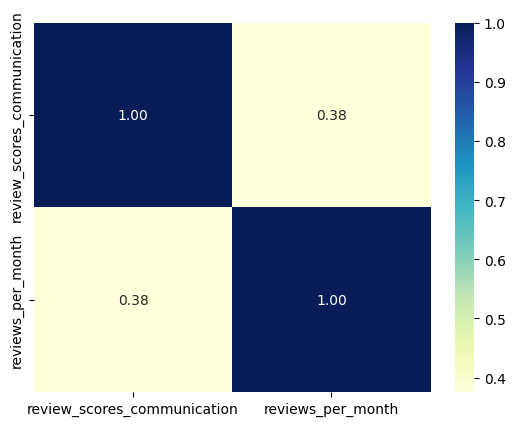

In [867]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

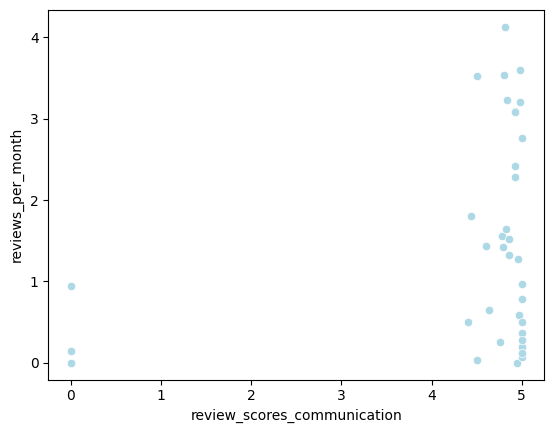

In [868]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [869]:
Vars_Indep= x
Var_Dep= y

In [870]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [871]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [872]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [873]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.2740233]]),
 'rank_': 1,
 'singular_': array([12.43211109]),
 'intercept_': array([0.1625107])}

####**Modelo matemático**
 Modelo matemático:y= 0.2740233x + 0.1625107

---




In [874]:
y_pred= model.predict(X=x)
y_pred

array([[0.1625107 ],
       [1.53262722],
       [0.1625107 ],
       [1.46686163],
       [1.53262722],
       [1.51070536],
       [1.47782256],
       [1.48056279],
       [1.49426396],
       [0.1625107 ],
       [1.39561557],
       [1.47508233],
       [1.53262722],
       [1.52440652],
       [1.52166629],
       [1.53262722],
       [1.51892606],
       [1.53262722],
       [1.43397883],
       [1.51070536],
       [1.48878349],
       [1.53262722],
       [1.52714676],
       [1.52714676],
       [0.1625107 ],
       [1.4723421 ],
       [0.1625107 ],
       [1.53262722],
       [1.49426396],
       [1.51070536],
       [1.48330303],
       [1.36821324],
       [0.1625107 ],
       [1.53262722],
       [1.53262722],
       [0.1625107 ],
       [1.37917417],
       [1.51070536],
       [1.53262722],
       [1.4230179 ],
       [1.39561557],
       [1.53262722],
       [0.1625107 ]])

In [875]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-875-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,review_scores_communication,Predicciones
21.0,0.00,0.162511
1062.0,5.00,1.532627
2670.0,0.00,0.162511
2805.0,4.76,1.466862
3065.0,5.00,1.532627
3257.0,4.92,1.510705
3359.0,4.80,1.477823
3372.0,4.81,1.480563
3455.0,4.86,1.494264
3571.0,0.00,0.162511


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

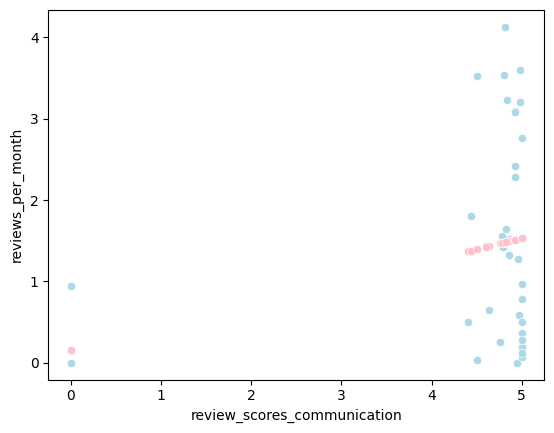

In [876]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [877]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [878]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.16806673804363048

In [879]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.40995943463180656

##**Tabla de coeficientes**

In [880]:
tabla=pd.DataFrame()

In [881]:
tipo=['Entire home/apt','Entire home/apt','Entire home/apt','Entire home/apt','Entire home/apt','Entire home/apt','Private Room','Private Room','Private Room','Private Room','Private Room','Private Room']

In [882]:
tabla['Tipo Habitación'] = tipo
tabla['Variable X'] = varx_e
tabla['Variable Y'] = vary_e  
tabla['Coef Determinación'] = deter_e
tabla['Coef Correlación'] = corr_e

In [883]:
tabla

,Tipo Habitación,Variable X,Variable Y,Coef Determinación,Coef Correlación
0,Entire home/apt,host_response_rate,host_acceptance_rate,0.479756,0.692644
1,Entire home/apt,price,host_acceptance_rate,0.000555,0.023561
2,Entire home/apt,number_of_reviews,host_acceptance_rate,0.017849,0.133599
3,Entire home/apt,review_scores_cleanliness,review_scores_location,0.806106,0.897834
4,Entire home/apt,number_of_reviews,availability_365,0.002782,0.052747
5,Entire home/apt,review_scores_communication,reviews_per_month,0.140989,0.375485
6,Private Room,host_response_rate,host_acceptance_rate,0.013333,0.115468
7,Private Room,price,host_acceptance_rate,0.000113,0.010608
8,Private Room,number_of_reviews,host_acceptance_rate,0.019622,0.140079
9,Private Room,review_scores_cleanliness,review_scores_location,0.829152,0.910578
